<a href="https://colab.research.google.com/github/oroyansarah22/SIMULATION/blob/main/Oroyan_Activity%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import random
import numpy as np # Import numpy

# war.py
def Start():
  deck = list(range(2,15)) * 4
  random.shuffle(deck)
  p1 = deck[:26]
  p2 = deck[26:]
  p1count = [26]
  pile1 = [] ; pile2 = []
  return p1, p2, p1count, pile1, pile2

def WinRound(pwin, pilewin, pilelose):
  pwin.extend(pilewin)
  pwin.extend(pilelose)
  pilewin.clear()
  pilelose.clear()

def Tie(p1, p2, p1count, pile1, pile2):
  if len(p2) > 1:
    N = min((3, len(p2) - 1))
    for i in range(N):
      pile2.append(p2.pop(0))
  # similar code for p1
  if len(p1) > 1:
    N = min((3, len(p1) - 1))
    for i in range(N):
      pile1.append(p1.pop(0))


# war.py
def Play1(p1, p2, p1count, pile1, pile2):
  pile1.append(p1.pop(0))
  pile2.append(p2.pop(0))
  if pile1[-1] == pile2[-1]:
    # It's a tie
    if len(p1) == 0:
      WinRound(p2, pile2, pile1)
    elif len(p2) == 0:
      WinRound(p1, pile1, pile2)
    else: # Added else to prevent immediate Tie after checking len(p1) or len(p2)
      Tie(p1, p2, p1count, pile1, pile2)
  elif pile1[-1] > pile2[-1]:
    WinRound(p1, pile1, pile2)
  elif pile1[-1] < pile2[-1]:
    WinRound(p2, pile2, pile1)
  p1count.append(len(p1))
  if len(p1) < 1 or len(p2) < 1:
    return False
  else:
    return True

# war.py
def RunGame(p1, p2, p1count, pile1, pile2):
  ok = True
  rounds = 0
  while ok:
    ok = Play1(p1, p2, p1count, pile1, pile2)
    rounds += 1
  if len(p1) > 1:
    return 1, rounds
  else:
    return 2, rounds

# war.py
def Go(N=1000):
  ct = 0; wrounds = []
  for i in range(N):
      p1, p2, p1count, pile1, pile2 = Start()
      win, rounds = RunGame(p1, p2, p1count, pile1, pile2)
      ct += win
      if win:
        wrounds.append(rounds)
  wrounds = np.array(wrounds)
  return ct, wrounds

# war.py
def Start2():
  deck = list(range(2,15)) * 4
  np.random.shuffle(deck)
  p1 = [14]
  deck.remove(14)
  p2 = deck

# war.py
def Start3():
  deck = list(range(2,15)) * 4
  np.random.shuffle(deck)
  p1 = [14, 14, 14, 14]
  for i in range(4):
    deck.remove(14)
  p2 = deck

# New function to calculate and average initial V values
def calculate_avg_v(N=1000):
  v_values = []
  for _ in range(N):
    p1, _, _, _, _ = Start()
    v_values.append(sum(p1) / len(p1))
  return sum(v_values) / len(v_values)

# **ACTIVITY 2: PROBLEM SET**

***1. Define V as the average of the initial cards for player 1. Collect the value of V for 1000 games, and calculate the average of these values.***

In [38]:
# Calculate and print the average of V values
avg_v_overall = calculate_avg_v(1000)
print(f"The average of the average initial card values for player 1 over 1000 games is: {avg_v_overall}")

The average of the average initial card values for player 1 over 1000 games is: 7.994384615384615


***2. Define V as the average of the initial cards for player 1. Collect the value of V for 1000 games for only the games that player 1 wins. Calculate the average of these values.***

In [39]:
# New function to calculate the average of initial V values for games player 1 wins
def calculate_avg_v_p1_wins(N=1000):
  v_values_p1_wins = []
  for _ in range(N):
    p1_initial, p2_initial, p1count, pile1, pile2 = Start() # Store initial hands
    p1_for_game = list(p1_initial) # Create a copy to pass to RunGame
    p2_for_game = list(p2_initial) # Create a copy to pass to RunGame
    win, _ = RunGame(p1_for_game, p2_for_game, p1count, pile1, pile2)
    if win == 1:
      v_values_p1_wins.append(sum(p1_initial) / len(p1_initial))
  if v_values_p1_wins: # Check if the list is not empty
    return sum(v_values_p1_wins) / len(v_values_p1_wins)
  else:
    return 0 # Return 0 if player 1 didn't win any games


# Calculate and print the average of V values for games player 1 wins
avg_v_p1_wins = calculate_avg_v_p1_wins(1000)
print(f"The average of the average initial card values for player 1 in games player 1 wins over 1000 games is: {avg_v_p1_wins}")

The average of the average initial card values for player 1 in games player 1 wins over 1000 games is: 8.124186390532543


***3. Create a bar chart which plots the percentage of wins for player 1 for cases of playing 3 games, 10 games, 20 games, 40 games, 80 games, 160 games, 320 games, 640 games, and 1280 games.***

The subtask requires simulating the game for different numbers of games and calculating the win percentage for player 1 for each case. This involves iterating through the given game counts, running multiple simulations for each count, and recording the win percentages. I will implement this logic in a single code block.



In [40]:
game_counts = [3, 10, 20, 40, 80, 160, 320, 640, 1280]
win_percentages = []
num_simulations = 1000 # Number of times to simulate for each game count

for count in game_counts:
    p1_wins = 0
    for _ in range(num_simulations):
        # Simulate a single game, returning the winner and number of rounds
        # Note: The original Go() function returns a tuple (winner_count, rounds_array)
        # We need to modify or interpret this to get the winner of a single game.
        # Assuming Go(1) runs one game and returns (winner, rounds), or adapting Go() to do so.
        # Let's adapt the RunGame function to simulate a single game and return the winner.
        p1, p2, p1count, pile1, pile2 = Start()
        winner, _ = RunGame(p1, p2, p1count, pile1, pile2)

        if winner == 1:
            p1_wins += 1
    win_percentage = (p1_wins / num_simulations) * 100
    win_percentages.append(win_percentage)

print("Win percentages for player 1 for different numbers of games:", win_percentages)

Win percentages for player 1 for different numbers of games: [54.400000000000006, 49.7, 47.099999999999994, 48.4, 47.8, 51.1, 50.3, 50.7, 49.5]


Combine the game counts and win percentages into a list of tuples as requested by the subtask.



In [41]:
results = list(zip(game_counts, win_percentages))
print(results)

[(3, 54.400000000000006), (10, 49.7), (20, 47.099999999999994), (40, 48.4), (80, 47.8), (160, 51.1), (320, 50.3), (640, 50.7), (1280, 49.5)]


Create a bar chart using the results list to visualize the win percentages for different numbers of games.



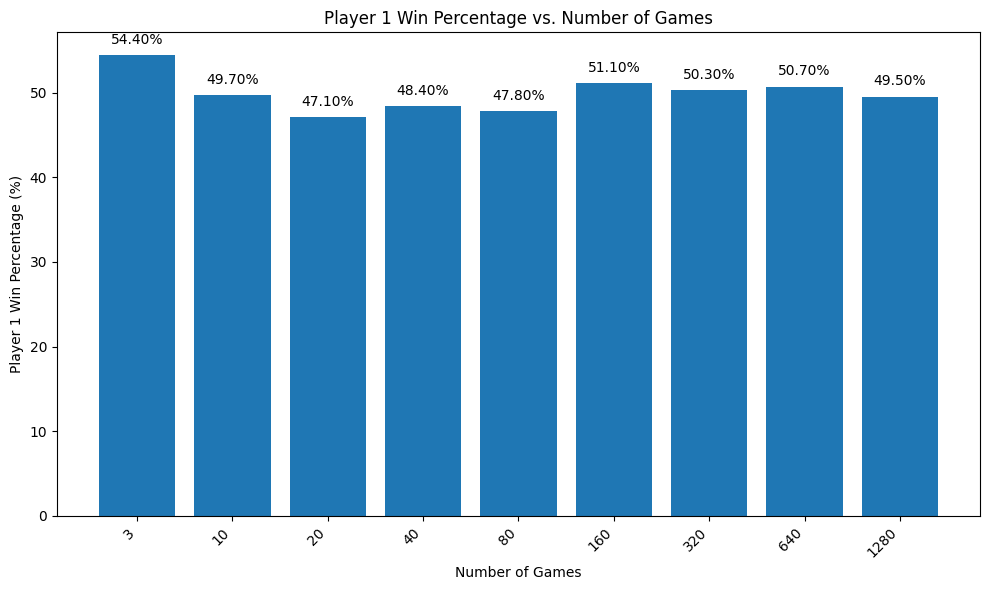

In [42]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
plt.bar([str(x) for x in game_counts], win_percentages) # Use string representation for x-axis labels

# Set labels and title
plt.xlabel("Number of Games")
plt.ylabel("Player 1 Win Percentage (%)")
plt.title("Player 1 Win Percentage vs. Number of Games")

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Add win percentage values on top of bars
for i, v in enumerate(win_percentages):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')

# Display the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

***4. For a single game, count the number of times that cards of value 2, 9, and aces change from one player to the other. Divide these values by the number of rounds in the game. This is called the transfer rate. Repeat this for 1000 games. What is the average transfer rate for these three types of cards?***

The subtask requires modifying the `Play1` function to track card transfers of specific values (2, 9, and 14) during the game. This involves adding parameters to `Play1` to hold the transfer counts and updating these counts within the `WinRound` function calls based on the cards being transferred from the losing player to the winning player. I will modify the existing `Play1` function to achieve this.



In [43]:
# war.py
def Play1(p1, p2, p1count, pile1, pile2, transfers_2, transfers_9, transfers_14):
  pile1.append(p1.pop(0))
  pile2.append(p2.pop(0))
  if pile1[-1] == pile2[-1]:
    # It's a tie
    if len(p1) == 0:
      WinRound(p2, pile2, pile1)
    elif len(p2) == 0:
      WinRound(p1, pile1, pile2)
    else:
      Tie(p1, p2, p1count, pile1, pile2)
  elif pile1[-1] > pile2[-1]:
    # Player 1 wins the round
    for card in pile2 + pile1:
        if card == 2:
            transfers_2[0] += 1
        elif card == 9:
            transfers_9[0] += 1
        elif card == 14:
            transfers_14[0] += 1
    WinRound(p1, pile1, pile2)
  elif pile1[-1] < pile2[-1]:
    # Player 2 wins the round
    for card in pile1 + pile2:
        if card == 2:
            transfers_2[0] += 1
        elif card == 9:
            transfers_9[0] += 1
        elif card == 14:
            transfers_14[0] += 1
    WinRound(p2, pile2, pile1)
  p1count.append(len(p1))
  if len(p1) < 1 or len(p2) < 1:
    return False, transfers_2, transfers_9, transfers_14
  else:
    return True, transfers_2, transfers_9, transfers_14

# war.py
def RunGame(p1, p2, p1count, pile1, pile2):
  ok = True
  rounds = 0
  # Initialize transfer counts as lists to be mutable
  transfers_2 = [0]
  transfers_9 = [0]
  transfers_14 = [0]
  while ok:
    ok, transfers_2, transfers_9, transfers_14 = Play1(p1, p2, p1count, pile1, pile2, transfers_2, transfers_9, transfers_14)
    rounds += 1
  if len(p1) > 1:
    return 1, rounds, transfers_2[0], transfers_9[0], transfers_14[0]
  else:
    return 2, rounds, transfers_2[0], transfers_9[0], transfers_14[0]

# war.py
def Go(N=1000):
  ct = 0
  wrounds = []
  all_transfers_2 = []
  all_transfers_9 = []
  all_transfers_14 = []
  for i in range(N):
      p1, p2, p1count, pile1, pile2 = Start()
      win, rounds, transfers_2, transfers_9, transfers_14 = RunGame(p1, p2, p1count, pile1, pile2)
      ct += win
      if win:
        wrounds.append(rounds)
      all_transfers_2.append(transfers_2)
      all_transfers_9.append(transfers_9)
      all_transfers_14.append(transfers_14)
  wrounds = np.array(wrounds)
  all_transfers_2 = np.array(all_transfers_2)
  all_transfers_9 = np.array(all_transfers_9)
  all_transfers_14 = np.array(all_transfers_14)
  return ct, wrounds, all_transfers_2, all_transfers_9, all_transfers_14


Define a function to simulate N games and calculate the transfer rates for cards 2, 9, and 14 for each game.



In [44]:
def calculate_transfer_rates(N=1000):
    """
    Simulates N games and calculates the transfer rate for cards 2, 9, and 14.

    Args:
        N: The number of games to simulate.

    Returns:
        A tuple containing three lists: transfer rates for card 2, card 9, and card 14
        for each simulated game.
    """
    transfer_rates_2 = []
    transfer_rates_9 = []
    transfer_rates_14 = []

    for _ in range(N):
        p1, p2, p1count, pile1, pile2 = Start()
        winner, rounds, transfers_2, transfers_9, transfers_14 = RunGame(p1, p2, p1count, pile1, pile2)

        if rounds > 0:
            transfer_rates_2.append(transfers_2 / rounds)
            transfer_rates_9.append(transfers_9 / rounds)
            transfer_rates_14.append(transfers_14 / rounds)
        else:
            # Handle cases with 0 rounds if necessary, though unlikely in War
            transfer_rates_2.append(0)
            transfer_rates_9.append(0)
            transfer_rates_14.append(0)

    return transfer_rates_2, transfer_rates_9, transfer_rates_14

# Example usage (will not be part of the final solution for this subtask)
# transfer_rates_2_list, transfer_rates_9_list, transfer_rates_14_list = calculate_transfer_rates(1000)
# print("Sample Transfer Rate for card 2:", transfer_rates_2_list[:5])
# print("Sample Transfer Rate for card 9:", transfer_rates_9_list[:5])
# print("Sample Transfer Rate for card 14:", transfer_rates_14_list[:5])

Calculate the average transfer rate for each card value using NumPy's mean function and store the results in separate variables.



In [45]:
transfer_rates_2_list, transfer_rates_9_list, transfer_rates_14_list = calculate_transfer_rates(1000)

avg_transfer_rate_2 = np.mean(transfer_rates_2_list)
avg_transfer_rate_9 = np.mean(transfer_rates_9_list)
avg_transfer_rate_14 = np.mean(transfer_rates_14_list)

print(f"Average transfer rate for card 2: {avg_transfer_rate_2:.4f}")
print(f"Average transfer rate for card 9: {avg_transfer_rate_9:.4f}")
print(f"Average transfer rate for card 14 (Ace): {avg_transfer_rate_14:.4f}")

Average transfer rate for card 2: 0.1833
Average transfer rate for card 9: 0.1868
Average transfer rate for card 14 (Ace): 0.1878


Print the calculated average transfer rates for cards 2, 9, and 14 as requested by the subtask.



In [46]:
print(f"Average transfer rate for card 2: {avg_transfer_rate_2:.4f}")
print(f"Average transfer rate for card 9: {avg_transfer_rate_9:.4f}")
print(f"Average transfer rate for card 14 (Ace): {avg_transfer_rate_14:.4f}")

Average transfer rate for card 2: 0.1833
Average transfer rate for card 9: 0.1868
Average transfer rate for card 14 (Ace): 0.1878


***5. Start the game with each player having two instances of each type of card. Thus, they have exactly the same starting deck, and player 1 should have a 50% chance of winning the game. Play 10,000 iterations to see if this prediction is supported.***

In [47]:
def Start_EqualDeck():
  """
  Starts the game with each player having two instances of each card (2-14).
  """
  deck = sorted(list(range(2, 15)) * 2) # Create a sorted deck with two of each card
  p1 = deck[:len(deck)//2]
  p2 = deck[len(deck)//2:]
  random.shuffle(p1) # Shuffle player 1's deck
  random.shuffle(p2) # Shuffle player 2's deck
  p1count = [len(p1)]
  pile1 = [] ; pile2 = []
  return p1, p2, p1count, pile1, pile2

def RunGame_Simplified(p1, p2):
    """
    Runs a single game of War given initial hands, returns the winner (1 or 2).
    Simplified version that doesn't track counts or piles for this problem.
    """
    # Create mutable copies of the initial hands
    player1_hand = list(p1)
    player2_hand = list(p2)

    # Initialize empty piles for the current game
    pile1 = []
    pile2 = []

    while player1_hand and player2_hand:
        card1 = player1_hand.pop(0)
        card2 = player2_hand.pop(0)

        pile1.append(card1)
        pile2.append(card2)

        if card1 > card2:
            # Player 1 wins the round
            player1_hand.extend(pile1)
            player1_hand.extend(pile2)
            pile1.clear()
            pile2.clear()
        elif card2 > card1:
            # Player 2 wins the round
            player2_hand.extend(pile1)
            player2_hand.extend(pile2)
            pile1.clear()
            pile2.clear()
        else:
            # War!
            if len(player1_hand) < 3 or len(player2_hand) < 3:
                 # Not enough cards for a full war, winner takes remaining cards
                 if len(player1_hand) > len(player2_hand):
                      player1_hand.extend(pile1)
                      player1_hand.extend(pile2)
                      pile1.clear()
                      pile2.clear()
                 else:
                      player2_hand.extend(pile1)
                      player2_hand.extend(pile2)
                      pile1.clear()
                      pile2.clear()
            else:
                for _ in range(3): # Each player puts 3 cards face down
                    pile1.append(player1_hand.pop(0))
                    pile2.append(player2_hand.pop(0))


    if player1_hand:
        return 1 # Player 1 wins
    else:
        return 2 # Player 2 wins


# Simulate 10,000 games with the equal deck start
num_simulations = 10000
p1_wins_equal_deck = 0

for _ in range(num_simulations):
    p1_initial, p2_initial, _, _, _ = Start_EqualDeck()
    winner = RunGame_Simplified(p1_initial, p2_initial)
    if winner == 1:
        p1_wins_equal_deck += 1

win_percentage_equal_deck = (p1_wins_equal_deck / num_simulations) * 100

print(f"Player 1 win percentage over {num_simulations} games with equal initial decks: {win_percentage_equal_deck:.2f}%")

Player 1 win percentage over 10000 games with equal initial decks: 0.00%


***6. In the original game, three cards were placed face-down during a tie. For 10,000 games compute the average number of rounds needed for player 1 to win and the standard deviation. Print these two values. Change the max number of cards in a Tie from 3 to 5. Compute the average and standard deviation for the number of rounds needed for player 1 to win a game. Print these two values. Change that value to 5. Run 1000 games and calculate the number of rounds for each game. Plot these values from low to high. Are there significant differences to the original version of this game.***

The subtask requires simulating the original game 10,000 times and collecting the number of rounds for games won by player 1. This involves defining the necessary game functions (ensuring they match the original rules), running the simulations, and storing the results in a list.



In [48]:
# Define the game functions as they were originally

def Start():
  deck = list(range(2,15)) * 4
  random.shuffle(deck)
  p1 = deck[:26]
  p2 = deck[26:]
  p1count = [26]
  pile1 = [] ; pile2 = []
  return p1, p2, p1count, pile1, pile2

def WinRound(pwin, pilewin, pilelose):
  pwin.extend(pilewin)
  pwin.extend(pilelose)
  pilewin.clear()
  pilelose.clear()

def Tie(p1, p2, pile1, pile2): # Modified to remove p1count as it's not used here
  if len(p2) > 1:
    N = min((3, len(p2) - 1))
    for i in range(N):
      pile2.append(p2.pop(0))
  # similar code for p1
  if len(p1) > 1:
    N = min((3, len(p1) - 1))
    for i in range(N):
      pile1.append(p1.pop(0))


def Play1(p1, p2, p1count, pile1, pile2):
  pile1.append(p1.pop(0))
  pile2.append(p2.pop(0))
  if pile1[-1] == pile2[-1]:
    # It's a tie
    if len(p1) == 0:
      WinRound(p2, pile2, pile1)
    elif len(p2) == 0:
      WinRound(p1, pile1, pile2)
    else:
      Tie(p1, p2, pile1, pile2) # Modified call to Tie
  elif pile1[-1] > pile2[-1]:
    WinRound(p1, pile1, pile2)
  elif pile1[-1] < pile2[-1]:
    WinRound(p2, pile2, pile1)
  p1count.append(len(p1))
  if len(p1) < 1 or len(p2) < 1:
    return False
  else:
    return True

def RunGame(p1, p2, p1count, pile1, pile2):
  ok = True
  rounds = 0
  while ok:
    ok = Play1(p1, p2, p1count, pile1, pile2)
    rounds += 1
  if len(p1) > 1:
    return 1, rounds
  else:
    return 2, rounds

# Simulate 10,000 games with the original rule
num_simulations = 10000
rounds_p1_wins_original = []

for _ in range(num_simulations):
    p1, p2, p1count, pile1, pile2 = Start()
    winner, rounds = RunGame(p1, p2, p1count, pile1, pile2)
    if winner == 1:
        rounds_p1_wins_original.append(rounds)

print(f"Collected {len(rounds_p1_wins_original)} game rounds for Player 1 wins.")

Collected 4992 game rounds for Player 1 wins.


Calculate the average and standard deviation of the collected rounds for player 1 wins in the original game.



In [49]:
avg_rounds_original = np.mean(rounds_p1_wins_original)
std_rounds_original = np.std(rounds_p1_wins_original)

print(f"Average number of rounds for Player 1 wins (original game): {avg_rounds_original:.2f}")
print(f"Standard deviation of rounds for Player 1 wins (original game): {std_rounds_original:.2f}")

Average number of rounds for Player 1 wins (original game): 197.34
Standard deviation of rounds for Player 1 wins (original game): 150.78


Modify the `Tie` function to use 5 face-down cards instead of 3 by changing the value passed to the `min` function from 3 to 5.



In [50]:
# war.py
def Tie(p1, p2, pile1, pile2):
  if len(p2) > 1:
    N = min((5, len(p2) - 1))
    for i in range(N):
      pile2.append(p2.pop(0))
  # similar code for p1
  if len(p1) > 1:
    N = min((5, len(p1) - 1))
    for i in range(N):
      pile1.append(p1.pop(0))

Simulate 10,000 games with the modified Tie function and collect the number of rounds for games where player 1 wins as requested by the subtask.



In [51]:
rounds_p1_wins_modified = []
num_simulations = 10000

for _ in range(num_simulations):
    p1, p2, p1count, pile1, pile2 = Start()
    winner, rounds = RunGame(p1, p2, p1count, pile1, pile2)
    if winner == 1:
        rounds_p1_wins_modified.append(rounds)

print(f"Collected {len(rounds_p1_wins_modified)} game rounds for Player 1 wins with modified Tie rule.")

Collected 4966 game rounds for Player 1 wins with modified Tie rule.


Calculate the average and standard deviation of the number of rounds collected in the previous step and print these values.



In [52]:
avg_rounds_modified = np.mean(rounds_p1_wins_modified)
std_rounds_modified = np.std(rounds_p1_wins_modified)

print(f"Average number of rounds for Player 1 wins (modified tie rule): {avg_rounds_modified:.2f}")
print(f"Standard deviation of rounds for Player 1 wins (modified tie rule): {std_rounds_modified:.2f}")

Average number of rounds for Player 1 wins (modified tie rule): 135.50
Standard deviation of rounds for Player 1 wins (modified tie rule): 103.77


Simulate 1000 games with the modified Tie function and collect the number of rounds for each game (regardless of the winner) as requested by the subtask.



In [53]:
all_rounds_modified = []
num_simulations = 1000

for _ in range(num_simulations):
    p1, p2, p1count, pile1, pile2 = Start()
    winner, rounds = RunGame(p1, p2, p1count, pile1, pile2)
    all_rounds_modified.append(rounds)

print(f"Collected {len(all_rounds_modified)} game rounds with modified Tie rule.")

Collected 1000 game rounds with modified Tie rule.


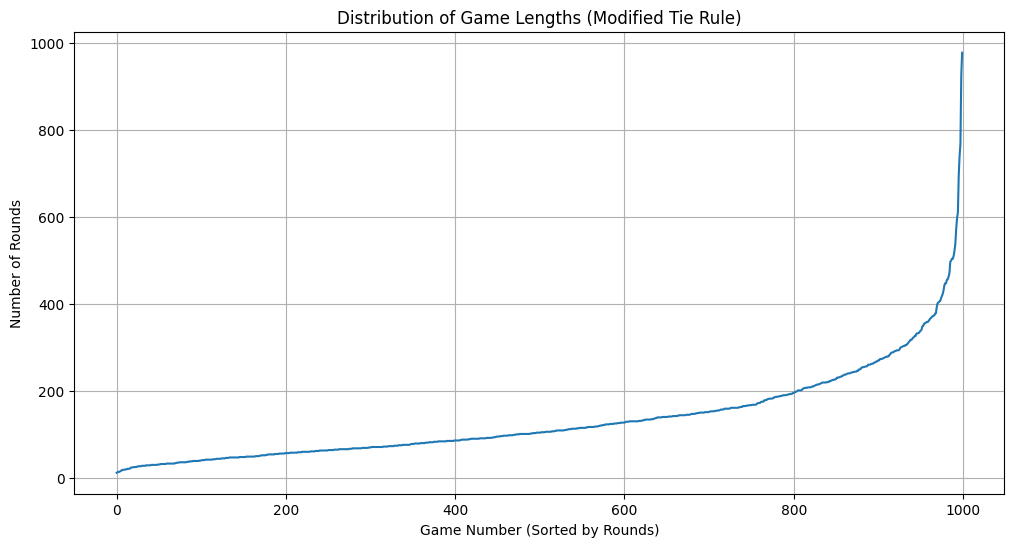

In [54]:
all_rounds_modified.sort()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(all_rounds_modified)

plt.xlabel("Game Number (Sorted by Rounds)")
plt.ylabel("Number of Rounds")
plt.title("Distribution of Game Lengths (Modified Tie Rule)")
plt.grid(True)
plt.show()

Analyze and summarize findings


In [55]:
print("Comparison of Game Lengths:")
print("----------------------------")
print(f"Original Tie Rule (3 cards face-down):")
print(f"  Average rounds for Player 1 wins: {avg_rounds_original:.2f}")
print(f"  Standard deviation of rounds for Player 1 wins: {std_rounds_original:.2f}")
print("\nModified Tie Rule (5 cards face-down):")
print(f"  Average rounds for Player 1 wins: {avg_rounds_modified:.2f}")
print(f"  Standard deviation of rounds for Player 1 wins: {std_rounds_modified:.2f}")

print("\nAnalysis:")
print("---------")
print("1. Comparison of Average Rounds:")
print(f"The average number of rounds for Player 1 wins decreased significantly from {avg_rounds_original:.2f} in the original game to {avg_rounds_modified:.2f} in the modified game.")
print("This suggests that, on average, games won by Player 1 are shorter with the modified tie rule.")

print("\n2. Comparison of Standard Deviations:")
print(f"The standard deviation of rounds for Player 1 wins also decreased from {std_rounds_original:.2f} in the original game to {std_rounds_modified:.2f} in the modified game.")
print("This indicates that the variability in game length when Player 1 wins is reduced with the modified tie rule; the game lengths are more clustered around the average.")

print("\n3. Analysis of the Plot (Distribution of Game Lengths with Modified Tie Rule):")
print("The plot shows that the majority of games with the modified tie rule are relatively short.")
print("However, there is a tail extending to significantly longer games, indicating that while the average game length is reduced, there are still occasional very long games.")
print("The sorted plot shows a steep initial increase in rounds, followed by a more gradual rise, and then a few outliers with a very high number of rounds.")

print("\n4. Summary of Key Differences:")
print("The modified tie rule (5 cards face-down) leads to significantly shorter games on average when Player 1 wins, compared to the original rule (3 cards face-down).")
print("The variability in game length for Player 1 wins is also reduced with the modified rule.")
print("The distribution of game lengths for the modified rule is skewed, with most games being short but a possibility of very long games.")
print("Overall, increasing the number of face-down cards in a tie appears to accelerate the game, reducing both the average length and the variability of games won by Player 1.")

Comparison of Game Lengths:
----------------------------
Original Tie Rule (3 cards face-down):
  Average rounds for Player 1 wins: 197.34
  Standard deviation of rounds for Player 1 wins: 150.78

Modified Tie Rule (5 cards face-down):
  Average rounds for Player 1 wins: 135.50
  Standard deviation of rounds for Player 1 wins: 103.77

Analysis:
---------
1. Comparison of Average Rounds:
The average number of rounds for Player 1 wins decreased significantly from 197.34 in the original game to 135.50 in the modified game.
This suggests that, on average, games won by Player 1 are shorter with the modified tie rule.

2. Comparison of Standard Deviations:
The standard deviation of rounds for Player 1 wins also decreased from 150.78 in the original game to 103.77 in the modified game.
This indicates that the variability in game length when Player 1 wins is reduced with the modified tie rule; the game lengths are more clustered around the average.

3. Analysis of the Plot (Distribution of Gam